<a href="https://colab.research.google.com/github/Yuan325/CSCI6364_MachineLearning/blob/main/Project2/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/mayanksrivastava/predict-housing-prices-simple-linear-regression/data


In [3]:
from google.colab import files

files.upload() # upload data file

Saving kc_house_data.csv to kc_house_data.csv


{'kc_house_data.csv': b'id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15\n"7129300520","20141013T000000",221900,3,1,1180,5650,"1",0,0,3,7,1180,0,1955,0,"98178",47.5112,-122.257,1340,5650\n"6414100192","20141209T000000",538000,3,2.25,2570,7242,"2",0,0,3,7,2170,400,1951,1991,"98125",47.721,-122.319,1690,7639\n"5631500400","20150225T000000",180000,2,1,770,10000,"1",0,0,3,6,770,0,1933,0,"98028",47.7379,-122.233,2720,8062\n"2487200875","20141209T000000",604000,4,3,1960,5000,"1",0,0,5,7,1050,910,1965,0,"98136",47.5208,-122.393,1360,5000\n"1954400510","20150218T000000",510000,3,2,1680,8080,"1",0,0,3,8,1680,0,1987,0,"98074",47.6168,-122.045,1800,7503\n"7237550310","20140512T000000",1.225e+006,4,4.5,5420,101930,"1",0,0,3,11,3890,1530,2001,0,"98053",47.6561,-122.005,4760,101930\n"1321400060","20140627T000000",257500,3,2.25,1715,6819,"2",0,0,3,7,1715,0,1995,0,"98003

In [4]:
import csv
import numpy as np

reader = csv.reader(open('/content/kc_house_data.csv', 'r'))
header = next(reader)
header = header[2:]
data=[]
for row in reader: 
  data.append(row)
data = np.array(data)
#np.random.shuffle(data)
data = data[:, 2:].astype(np.float)

# 21613 dataset
split = 17290 #80/10/10
split2 = 19452
train_data = data[:split]
val_data = data[split: split2]
test_data = data[split2:]

train_x = train_data[:, 1:]
train_y = train_data[:, 0]
val_x = val_data[:, 1:]
val_y = val_data[:, 0]
test_x = test_data[:, 1:]
test_y = test_data[:, 0]

min = []
max = []
for i in range(len(train_x[0])):
  min.append(np.amin(train_x[:,i]))
  max.append(np.amax(train_x[:,i]))

for i in range(len(min)):
  train_x[:,i]=(train_x[:,i] - min[i]) / (max[i]-min[i])
  val_x[:,i]=(val_x[:,i] - min[i]) / (max[i]-min[i])
  test_x[:,i]=(test_x[:,i] - min[i]) / (max[i]-min[i])

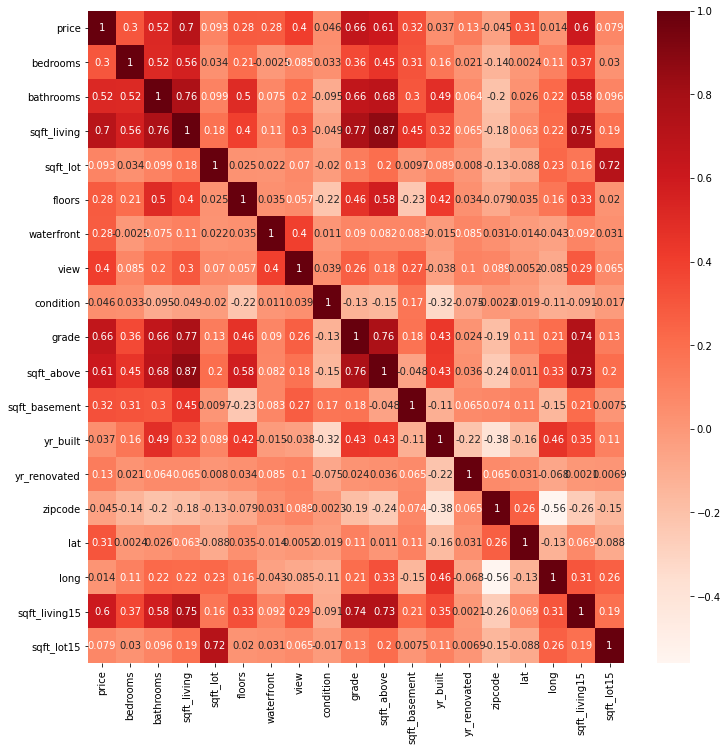

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# heatmap for Pearson Correlation of training data
df = pd.DataFrame(train_data, columns = header)
plt.figure(figsize=(12, 12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
import matplotlib.pyplot as plt

# plot
def printScatter(x1, x2, bias, slope, name1="Data 1", name2 = "Data 2"):
  plt.style.use('seaborn-whitegrid')
  plt.scatter(x1, x2, color= 'red')
  plt.plot(x1, predict(x1, bias, slope), color = 'green')
  plt.xlabel(name1)
  plt.ylabel(name2)
  plt.show()
  return

def plotEpoch(x1, x2, epochs, data = ""):
  plt.style.use('seaborn-whitegrid')
  plt.plot(epochs, x1, 'g', label= "Training " + data)
  plt.plot(epochs, x2, 'b', label= "Validation " + data)
  plt.title("Training and Validation " + data)
  plt.xlabel("Epochs")
  plt.ylabel(data)
  plt.legend()
  plt.show()

# linear regression
def fit(train_x, train_y, test_x, test_y, learning_rate, epoch):
  slope = 0
  bias = 0
  train_losses = []
  train_accs = []
  test_losses = []
  test_accs = []
  epochs = []
  n = len(train_x)
  for i in range(1, epoch+1):
    tr_yhat = slope * train_x + bias
    if (i % 100 == 0):
      epochs.append(i)
      tr_loss = squared_loss(tr_yhat, train_y)
      train_losses.append(tr_loss)
      tr_acc = r_squared(tr_yhat, train_y)
      train_accs.append(tr_acc)

      te_yhat = slope * test_x + bias
      te_loss = squared_loss(te_yhat, test_y)
      test_losses.append(te_loss)
      te_acc = r_squared(te_yhat, test_y)
      test_accs.append(te_acc)

    diff_slope = (-2/n) * np.sum(train_x * (train_y - tr_yhat))
    diff_bias = (-2/n) * np.sum(train_y - tr_yhat)
    slope = slope - learning_rate * diff_slope
    bias = bias - learning_rate * diff_bias
  print("Learning rate: ", learning_rate)
  plotEpoch(train_losses, test_losses, epochs, "Loss")
  plotEpoch(train_accs, test_accs, epochs, "Accuracy")
  return bias, slope

def predict(test_x, bias, slope):
  pred = []
  for x in test_x:
    y = (slope * x) + bias
    pred.append(y)
  return pred

def squared_loss(pred, test_y):
  n = len(pred)
  total_sl = 0
  for i in range(n):
    total_sl += (test_y[i] - pred[i]) ** 2
  return total_sl/n

def r_squared(pred, test_y):
  n = len(pred)
  tot_y = 0
  for i in range(n):
    tot_y += test_y[i]
  mean_y = tot_y/n

  ssr = 0
  sst = 0
  for i in range(n):
    ssr += (test_y[i] - pred[i]) ** 2
    sst += (test_y[i] - mean_y) ** 2
  return 1.0 - (ssr/sst)

def linear_regression(train_x, train_y, val_x, val_y, learning_rates, epochs):
  biases = []
  slopes = []
  rss = []
  losses = []
  best_rs = -1
  best_lr = -1
  for ind, lr in enumerate(learning_rates):
    bias, slope= fit(train_x, train_y, val_x, val_y, lr, epochs)
    biases.append(bias)
    slopes.append(slope)
    pred = predict(val_x, bias, slope)
    loss = squared_loss(pred, val_y)
    rs = r_squared(pred, val_y) * 100
    losses.append(loss)
    rss.append(rs)
    if rs > best_rs:
      best_rs = rs
      best_lr = ind
    print("Training data scatterplot")
    printScatter(train_x, train_y, bias, slope, name1="square feet living", name2 = "price")
    print("Validation data scatterplot")
    printScatter(val_x, val_y, bias, slope, name1="square feet living", name2 = "price")
  
  return best_lr, biases, slopes, rss, losses

Learning rate:  0.001


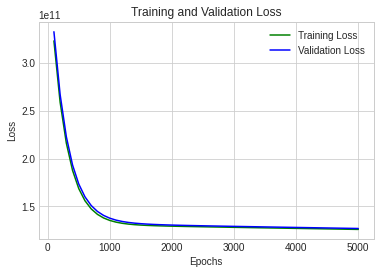

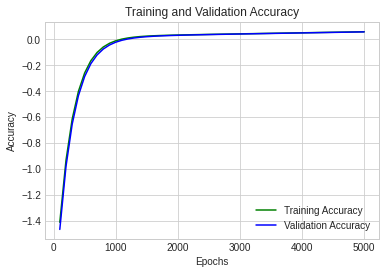

Training data scatterplot


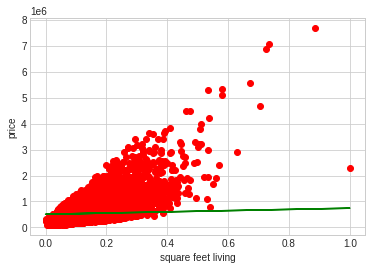

Validation data scatterplot


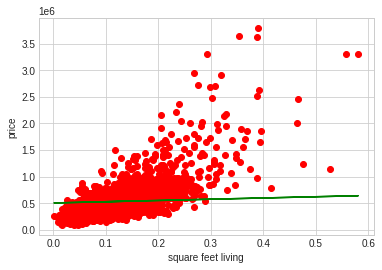

Learning rate:  0.01


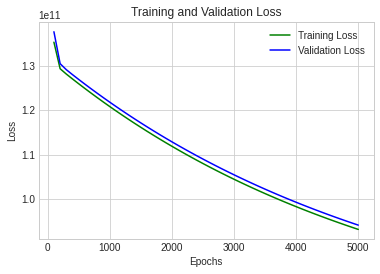

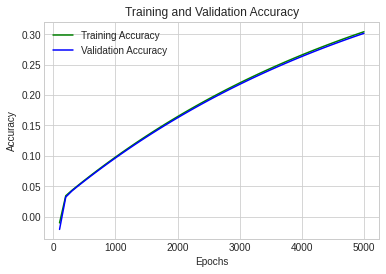

Training data scatterplot


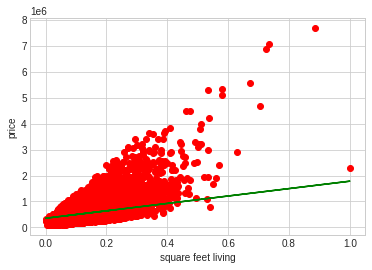

Validation data scatterplot


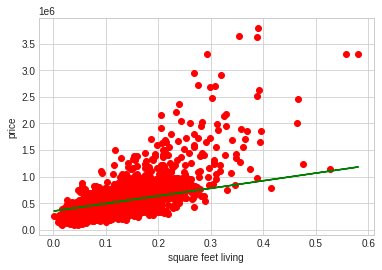

Learning rate:  0.05


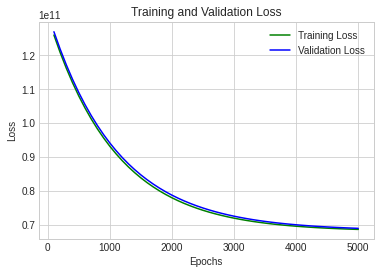

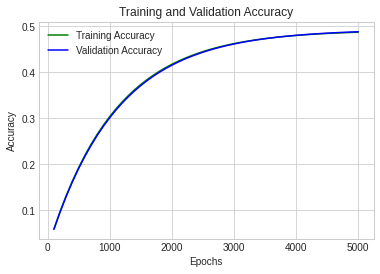

Training data scatterplot


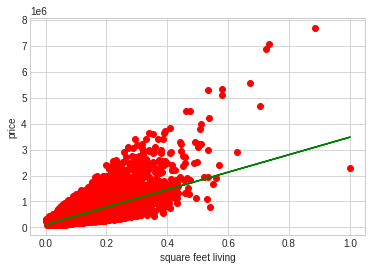

Validation data scatterplot


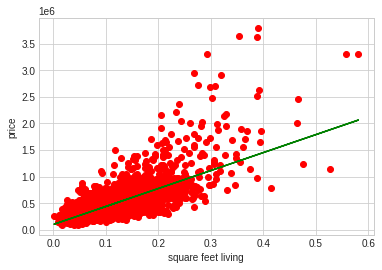

Learning rate:  0.1


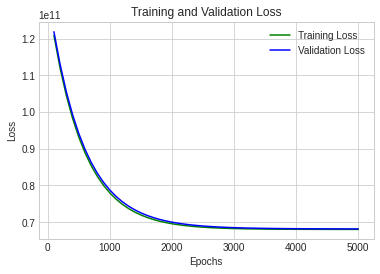

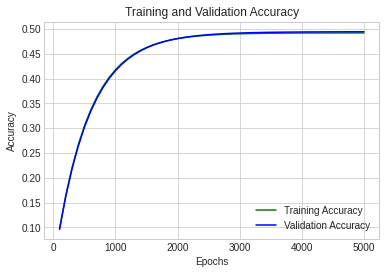

Training data scatterplot


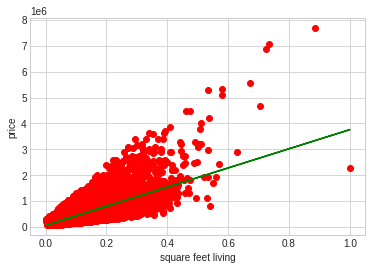

Validation data scatterplot


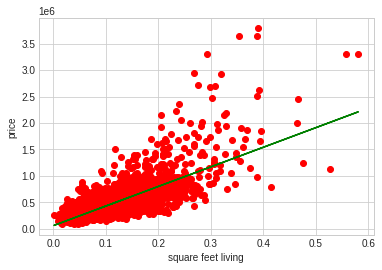

Learning rate:  0.5


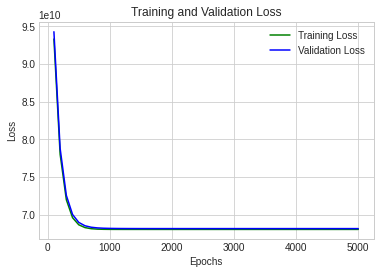

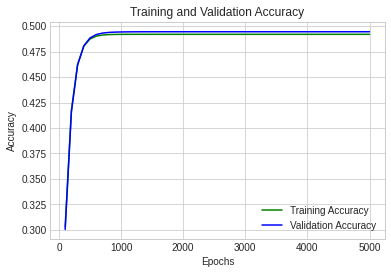

Training data scatterplot


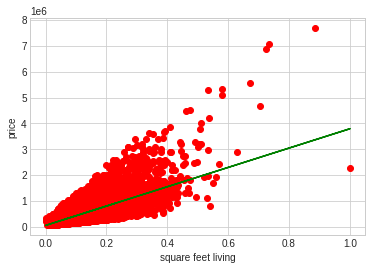

Validation data scatterplot


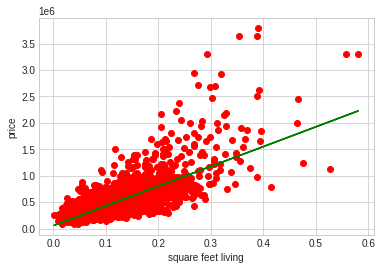

Time taken to run all:  25.575069904327393

squared loss:  71264741554.32114
r-squared value:  48.62051319792396
Training data scatterplot


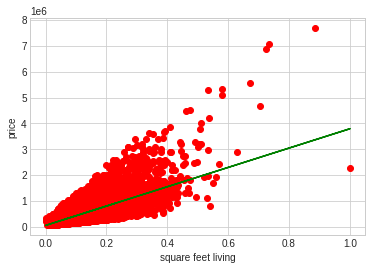

Testing data scatterplot


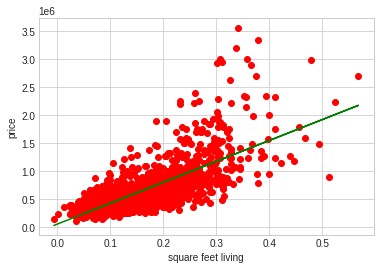

In [7]:
import time

train_feature_x = train_x[:,2]
val_feature_x = val_x[:,2]
test_feature_x = test_x[:,2]

start = time.time()
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]
lr_idx, biases, slopes, rss, losses = linear_regression(train_feature_x, train_y, val_feature_x, val_y, learning_rates, 5000)
end = time.time()
print("Time taken to run all: ", end-start)

bias = biases[lr_idx]
slope = slopes[lr_idx]
pred = predict(test_feature_x, bias, slope)
loss = squared_loss(pred, test_y)
rs = r_squared(pred, test_y) * 100
print()
print("squared loss: ", loss)
print("r-squared value: ", rs)

print("Training data scatterplot")
printScatter(train_feature_x, train_y, bias, slope, name1="square feet living", name2 = "price")
print("Testing data scatterplot")
printScatter(test_feature_x, test_y, bias, slope, name1="square feet living", name2 = "price")
